# Optimisez la gestion des données d'une boutique avec Python

#### Importation

In [1]:
from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import tkinter
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

#### Importation des données et Profiling

In [2]:
df_web = pd.read_excel('C:/Users/Nherro/Desktop/OpenClassRooms/P5_Vella_Frederic/Doc P5/Donnees/web.xlsx')
print(df_web.shape)
#df_web.head()

(1513, 28)


In [3]:
#Profiling WEB
#profdf_web = ProfileReport(df_web)
#profiledf_web  =  ProfileReport ( df_web , title = "Donnée Web" )
#profiledf_web

In [4]:
df_erp = pd.read_excel('C:/Users/Nherro/Desktop/OpenClassRooms/P5_Vella_Frederic/Doc P5/Donnees/erp.xlsx')
print(df_erp.shape)
#df_web.head()

(825, 5)


In [5]:
#Profiling ERP
#profdf_erp = ProfileReport(df_erp)
#profiledf_erp  =  ProfileReport ( df_erp , title = "Donnée ERP" )
#profiledf_erp

In [6]:
df_liaison= pd.read_excel('C:/Users/Nherro/Desktop/OpenClassRooms/P5_Vella_Frederic/Doc P5/Donnees/liaison.xlsx')
print(df_liaison.shape)
#df_liaison.head()

(825, 2)


In [7]:
#Renommage id_web en sku
df_liaison.rename(columns={'id_web':'sku'}, inplace=True)

In [8]:
#Profiling LIAISON
#profdf_liaison = ProfileReport(df_liaison)
#profiledf_liaison  =  ProfileReport ( df_liaison , title = "Donnée LIAISON " )
#profiledf_liaison

### Vérification unicité des clés primaire

##### Vérification unicité des clé primaire ERP

In [9]:
(df_erp['product_id'].duplicated()).sum() #Nombre de valeurs en doublon sur product_id

0

##### Vérification unicité des clé primaire WEB

In [10]:
(df_web['sku'].duplicated()).sum() #Nombre de valeurs en doublon sur sku

798

In [11]:
df_web.groupby('sku').agg({'sku':'count'}) #Visualisation des valeurs en doublon

,sku
sku,
38,2
41,2
304,2
523,2
531,2
...,...
19820,2
19821,2
19822,2


Verification des doublons

In [12]:
df_web.loc[df_web['sku'] == 38]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
339,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1123,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [13]:
df_web.loc[df_web['sku'] == 304]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
70,304,0,0,0,0.0,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,...,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
868,304,0,0,0,0.0,40.0,NaN,NaN,2.0,2018-02-13 12:57:44,...,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Supression des clé primaire en double WEB

In [14]:
df_web.drop_duplicates(subset="sku", keep='first', inplace=True)#Supprime les valeurs en double

In [15]:
df_web.drop_duplicates(['sku']).shape

(715, 28)

##### Vérification unicité des clé primaire LIAISON

product_id

In [16]:
#Colonne product_id
(df_liaison['product_id'].duplicated()).sum() #Nombre de valeurs différente.

0

##### Jointure entre WEB et le fichier LIAISON

In [17]:
df_web = pd.merge(df_liaison, df_web, on  = "sku" ,how = 'left')
print(df_web.shape)
#df_web.head()

(825, 29)


##### Jointure avec le fichier ERP

In [18]:
df_data = pd.merge(df_erp, df_web, on  ="product_id", how='left')
print(df_data.shape)
#df_data

(825, 33)


#### Data profiling

In [19]:
#profdf_data = ProfileReport(df_data)
#profiledf_data  =  ProfileReport ( df_data , title = "Donnée vente" )
#profiledf_data

### Nettoyage des données

Suppression des colonnes qui comportent une valeur unique

In [20]:
#calcule le nombre de valeurs uniques dans le dataframe et supprime les colonnes qui n'ont qu'une seule valeur unique.
#nunique = df_data.apply(pd.Series.nunique)
#cols_to_drop = nunique[nunique == 1].index
#df_data = df_data.drop(cols_to_drop, axis=1)

In [21]:
#df_data.head()

Detection valeur manquante

In [22]:
#print(df_data.isnull().sum())

In [23]:
#Suppression les colonnes avec 100% de valeurs manquantes
#df_data = df_data.loc[:, df_data.isnull().mean() < 1]

Datetime

In [24]:
#df_data['post_date'] = pd.to_datetime(df_data['post_date'], format="%Y/%m/%d %H:%M:%S") #Convertir la colonne en Datetime

In [25]:
#df_data['post_date_gmt'] = pd.to_datetime(df_data['post_date_gmt'],format="%Y/%m/%d %H:%M:%S") #Convertir la colonne en Datetime

In [26]:
#df_data.dtypes

#### Calcul

#### Chiffre d'affaire par produit

In [27]:
chiffre_daffaires = df_data[['product_id', 'sku', 'onsale_web', 'price', 'total_sales']] #Selection des colonnes necessaires
chiffre_daffaires.set_index('product_id', inplace=True) #Utilisation de product_id comme index

In [28]:
chiffre_daffaires.to_csv('chiffre_daffaires.csv')

In [29]:
chiffre_daffaires['CA_produit'] = (chiffre_daffaires['price'] * chiffre_daffaires['total_sales']) #Prix * nombre de vente

In [30]:
chiffre_daffaires.sort_values(by=['CA_produit'], ascending=False).head() #CA par produit classé par valeur décroissante

,sku,onsale_web,price,total_sales,CA_produit
product_id,,,,,
4334,7818,1,49.0,96.0,4704.0
4144,1662,1,49.0,87.0,4263.0
4402,3510,1,176.0,13.0,2288.0
4142,11641,1,53.0,30.0,1590.0
4141,304,1,39.0,40.0,1560.0


#### Chiffre d'affaire total en ligne

In [31]:
vente_en_ligne = chiffre_daffaires.loc[chiffre_daffaires['onsale_web'] == 1] #Condition sur onsale_web, valeur boolean 1=vente en ligne

In [32]:
#vente_en_ligne.head()

Calcul du montant des bon cadeau

In [33]:
bon_cadeau = chiffre_daffaires[chiffre_daffaires['sku'] == 'bon-cadeau-25-euros']['CA_produit'].values[0]
bon_cadeau

250.0

#### Calcul CA total en ligne

In [34]:
CA_total = chiffre_daffaires['CA_produit'].sum() - bon_cadeau 
print('Le chiffre d\'affaire total est de:', CA_total)

Le chiffre d'affaire total est de: 70318.6


#### Vérification des valeurs aberrantes

Recherche des prix : bas moyen haut

In [35]:
print(' Le prix le plus bas est de ',chiffre_daffaires['price'].min(),
      '\n Le prix le plus haut est de ',chiffre_daffaires['price'].max(),
      '\n Le prix moyenne est de', round(chiffre_daffaires['price'].mean(),2)   )

 Le prix le plus bas est de  5.2 
 Le prix le plus haut est de  225.0 
 Le prix moyenne est de 32.42


#### Visualisation des valeurs aberrantes

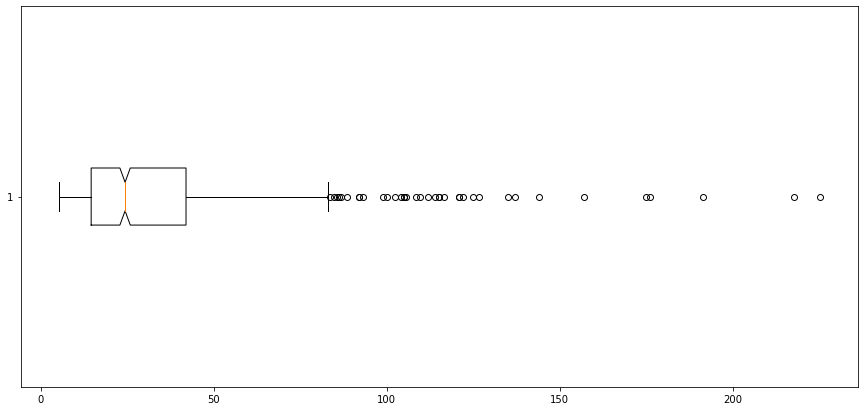

In [36]:
figure = plt.figure(figsize = (15, 7))
plt.boxplot(chiffre_daffaires['price'],notch = True,vert=0)
plt.show()

Valeur des outliers

In [37]:
#Utilisation des quartiles pour retrouver les valeurs aberrantes.
#percentile est un concept de statistique qui permet de déterminer la position d’une valeur par rapport à un groupe donné
#Q1 = 25 percentile des données
#Q3 = 75 percentile des données
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25)) # Différence entre le Quartile supérieure et le Quartile inférieure
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr) # Cherche les valeurs supérieur à Q3 + 1.5*IQR 
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr) # Cherche les valeurs inférieur à Q1 - 1.5*IQR
    f = []
    for i in s:
        if i > upper_bound: #Si prix > Q3 valeurs abberantes
            f.append(i)
        elif i < lower_bound: #Si prix < Q2 valeurs abberantes
            f.append(i)
    sums = len(f) #Nombre de Outlier
    pros = len(f)/len(s)*100 # % de Outlier
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(chiffre_daffaires.price)

,sub,values
0,IQR,27.400000
1,Upper Bound,83.100000
2,Lower Bound,-26.500000
3,Sum outliers,37.000000
4,percentage outliers,4.484848


Liste des valeurs abberrantes

In [38]:
valeurs_aberrantes = (chiffre_daffaires.loc[chiffre_daffaires['price'] > 83.1])
valeurs_aberrantes.sort_values(by=['price'], ascending=False)

,sku,onsale_web,price,total_sales,CA_produit
product_id,,,,,
4352,15940,1,225.0,5.0,1125.0
5001,14581,1,217.5,0.0,0.0
5892,14983,1,191.3,3.0,573.9
4402,3510,1,176.0,13.0,2288.0
5767,15185,1,175.0,0.0,0.0
4406,7819,1,157.0,0.0,0.0
4594,NaN,1,144.0,NaN,NaN
4904,14220,1,137.0,5.0,685.0
6126,14923,1,135.0,2.0,270.0
